In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file
data = pd.read_csv("BC-Data-Set.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4223 non-null   object 
 1   BC      4223 non-null   float64
 2   N_CPC   4223 non-null   float64
 3   PM-10   4223 non-null   float64
 4   PM-2.5  4223 non-null   float64
 5   PM-1.0  4223 non-null   float64
 6   NO2     4223 non-null   float64
 7   O3      4223 non-null   float64
 8   SO2     4223 non-null   float64
 9   CO      4223 non-null   float64
 10  NO      4223 non-null   float64
 11  NOX     4223 non-null   float64
 12  TEMP    4223 non-null   float64
 13  HUM     4223 non-null   float64
dtypes: float64(13), object(1)
memory usage: 462.0+ KB


In [3]:
#mean of data
import pandas as pd
mean_values = data.mean()
print(mean_values)

#mean of data as a new row 



BC         1.309454
N_CPC     13.651880
PM-10     15.132366
PM-2.5     9.302461
PM-1.0     7.259924
NO2       30.032402
O3        48.139158
SO2        1.368459
CO         0.312924
NO         7.796788
NOX       41.608059
TEMP      17.833411
HUM       70.848520
dtype: float64


/var/folders/dz/vjzgtvsn0dv9v9r8s48fg1t00000gn/T/ipykernel_12233/2445815749.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()


In [4]:
data

,date,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
0,2019-01-01 00:00:00,3.445,17.773,13.033,11.767,11.050,18.0,41.0,1.0,0.2,4.0,23.0,12.140,53.780
1,2019-01-01 01:00:00,5.162,24.620,17.050,15.533,14.783,62.0,1.0,1.0,0.2,22.0,96.0,11.683,55.100
2,2019-01-01 02:00:00,2.951,17.700,11.417,10.367,9.850,68.0,1.0,1.0,0.2,42.0,132.0,11.683,53.433
3,2019-01-01 03:00:00,1.917,12.212,7.750,7.100,6.683,75.0,1.0,1.0,0.2,66.0,176.0,11.367,54.533
4,2019-01-01 04:00:00,2.462,11.178,8.317,7.650,7.167,63.0,1.0,1.0,0.2,27.0,103.0,10.867,57.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,2019-12-10 19:00:00,0.728,9.275,7.300,5.267,3.267,30.0,57.0,1.0,0.2,2.0,33.0,22.033,93.367
4219,2019-12-10 20:00:00,0.787,9.420,7.500,5.467,3.417,37.0,46.0,1.0,0.2,1.0,38.0,22.100,93.317
4220,2019-12-10 21:00:00,1.056,9.296,7.233,5.283,3.200,16.0,67.0,1.0,0.2,1.0,17.0,22.200,93.333
4221,2019-12-10 22:00:00,0.804,9.504,7.667,5.450,3.133,15.0,68.0,1.0,0.2,1.0,16.0,22.183,93.417


In [5]:
# Convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Remove any missing values
data = data.dropna()

In [6]:
# Set the date column as the index of the DataFrame
data = data.set_index('date')

# Identify and highlight outliers using the z-score method
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)  # Set the threshold to 3 to identify outliers

In [7]:

# Assuming your DataFrame is named 'data' and the datetime index is named 'datetime_index'

# Count the number of unique hours for each date
hours_per_day = data.groupby(data.index.date).size()

print(hours_per_day)

# Get the dates that have less than 24 unique hours
incomplete_days = hours_per_day[hours_per_day < 24].index

print(incomplete_days)

# Convert the incomplete_days array to a DatetimeIndex
date_index = pd.DatetimeIndex(data.index.date)

# Filter the DataFrame to exclude the rows corresponding to incomplete days
data_complete_days = data[~date_index.isin(incomplete_days)]

data_incomplete_days = data[date_index.isin(incomplete_days)]


2019-01-01    24
2019-01-02    24
2019-01-03    24
2019-01-04    24
2019-01-08    24
              ..
2019-12-02    24
2019-12-03    22
2019-12-04    13
2019-12-09    24
2019-12-10    24
Length: 191, dtype: int64
Index([2019-01-17, 2019-01-23, 2019-01-24, 2019-01-29, 2019-01-31, 2019-02-02,
       2019-02-08, 2019-02-10, 2019-02-14, 2019-02-25, 2019-02-26, 2019-02-27,
       2019-02-28, 2019-03-01, 2019-03-02, 2019-03-09, 2019-03-10, 2019-03-26,
       2019-03-31, 2019-04-01, 2019-04-02, 2019-04-03, 2019-04-11, 2019-04-15,
       2019-04-17, 2019-05-01, 2019-05-02, 2019-05-11, 2019-07-01, 2019-07-02,
       2019-07-03, 2019-07-10, 2019-07-23, 2019-07-26, 2019-07-27, 2019-07-30,
       2019-08-02, 2019-08-04, 2019-08-10, 2019-08-22, 2019-08-29, 2019-09-04,
       2019-09-10, 2019-09-13, 2019-09-27, 2019-10-15, 2019-10-16, 2019-10-21,
       2019-10-23, 2019-10-27, 2019-11-02, 2019-12-03, 2019-12-04],
      dtype='object')


In [8]:
test= data.groupby([data.index.date])
test2 = pd.DataFrame()
for group_name, group_data in test:
    if len(group_data)!=24:
        existing_hours=group_data.index.hour.unique()
        missing_hours = set(range(24)) - set(existing_hours)
        missing_rows = pd.DataFrame(columns=group_data.columns)
        for missing_hour in missing_hours:
            datetime_obj = pd.to_datetime(group_data.index.date[0]) + pd.to_timedelta(missing_hour, unit='H')
            data.loc[datetime_obj] = mean_values

/var/folders/dz/vjzgtvsn0dv9v9r8s48fg1t00000gn/T/ipykernel_12233/3472870506.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, group_data in test:


In [9]:
data=data.sort_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4584 entries, 2019-01-01 00:00:00 to 2019-12-10 23:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BC      4584 non-null   float64
 1   N_CPC   4584 non-null   float64
 2   PM-10   4584 non-null   float64
 3   PM-2.5  4584 non-null   float64
 4   PM-1.0  4584 non-null   float64
 5   NO2     4584 non-null   float64
 6   O3      4584 non-null   float64
 7   SO2     4584 non-null   float64
 8   CO      4584 non-null   float64
 9   NO      4584 non-null   float64
 10  NOX     4584 non-null   float64
 11  TEMP    4584 non-null   float64
 12  HUM     4584 non-null   float64
dtypes: float64(13)
memory usage: 501.4 KB


In [10]:
summary_statistics = data.describe()
print(summary_statistics)

                BC       N_CPC        PM-10       PM-2.5       PM-1.0  \
count  4584.000000  4584.00000  4584.000000  4584.000000  4584.000000   
mean      1.309454    13.65188    15.132366     9.302461     7.259924   
std       1.077179     7.90552    13.681307     5.844837     5.259162   
min       0.110000     1.37600     0.600000     0.500000     0.333000   
25%       0.682000     8.00300     8.991750     5.317000     3.383000   
50%       1.037000    12.28950    13.625000     8.433000     6.383000   
75%       1.437250    16.95800    17.817000    11.533000     9.167000   
max      12.767000    73.49000   398.717000    76.833000    34.383000   

               NO2           O3          SO2           CO           NO  \
count  4584.000000  4584.000000  4584.000000  4584.000000  4584.000000   
mean     30.032402    48.139158     1.368459     0.312924     7.796788   
std      20.904562    25.055354     0.767196     0.203269    17.780870   
min       2.000000     1.000000     0.500000  

In [11]:
correlations = data.corr()
bc_correlations = correlations['BC']
print(bc_correlations)

BC        1.000000
N_CPC     0.514739
PM-10     0.331862
PM-2.5    0.504558
PM-1.0    0.496120
NO2       0.493987
O3       -0.352667
SO2       0.057469
CO        0.260429
NO        0.365809
NOX       0.466400
TEMP     -0.016964
HUM       0.129768
Name: BC, dtype: float64


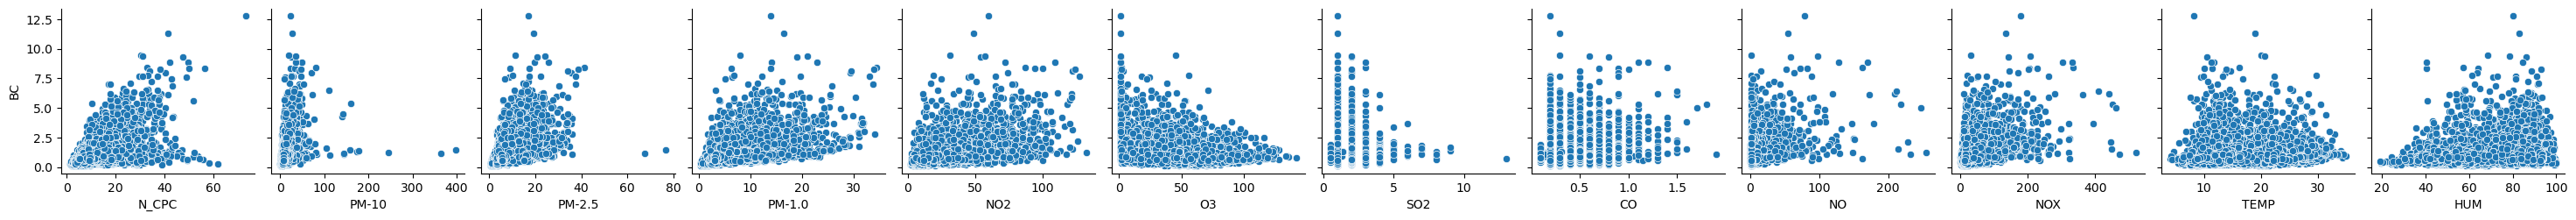

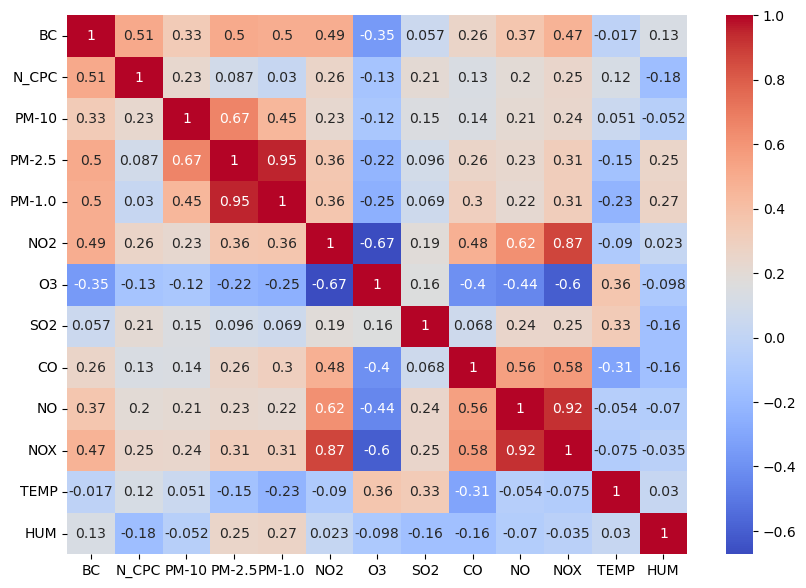

In [12]:
# Scatter plots
sns.pairplot(data, x_vars=data.columns[1:], y_vars=['BC'])

# Heat map
plt.figure(figsize=(10, 7))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()

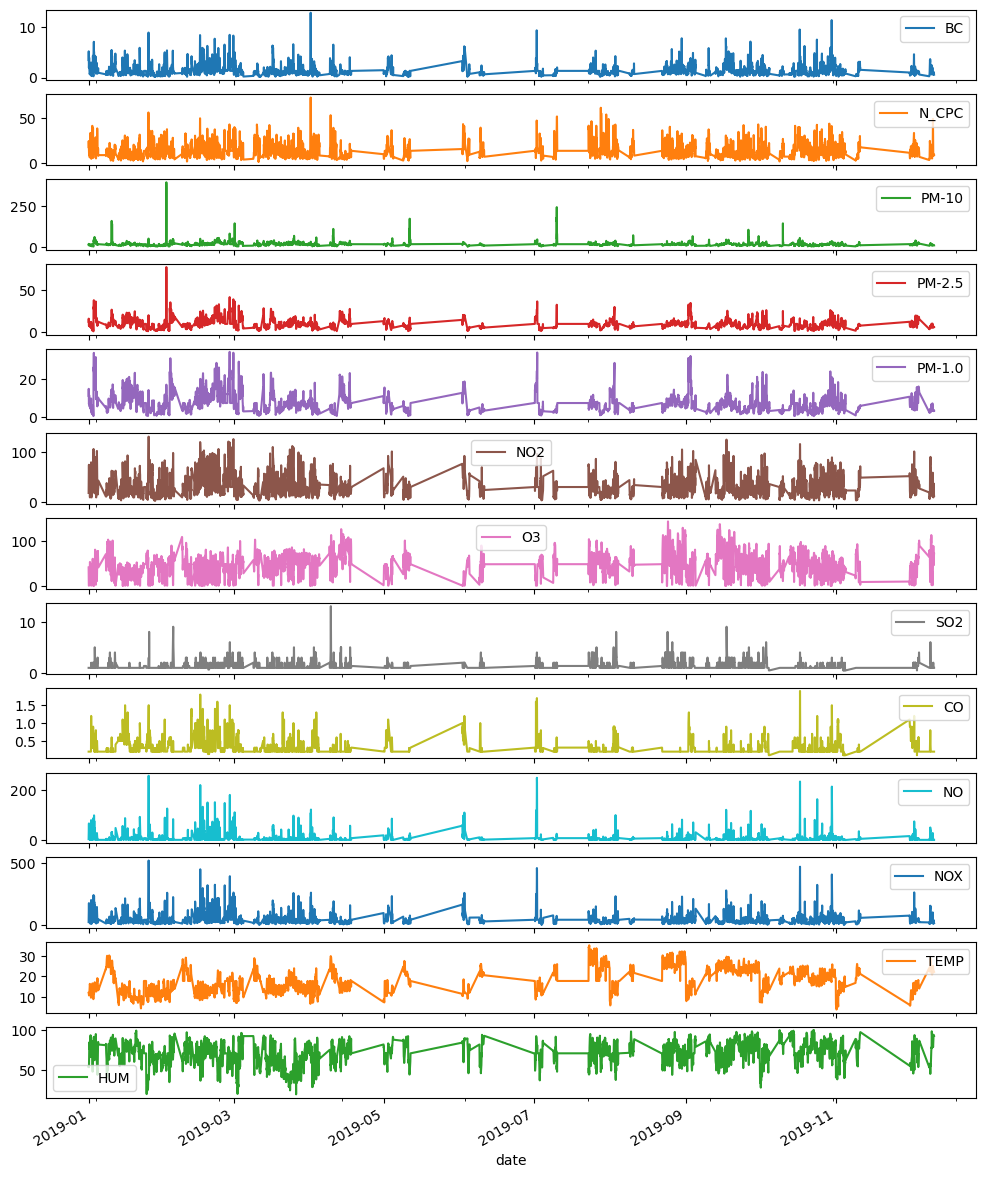

In [13]:
# Plot the time series data
data.plot(subplots=True, figsize=(12, 16))
plt.show()

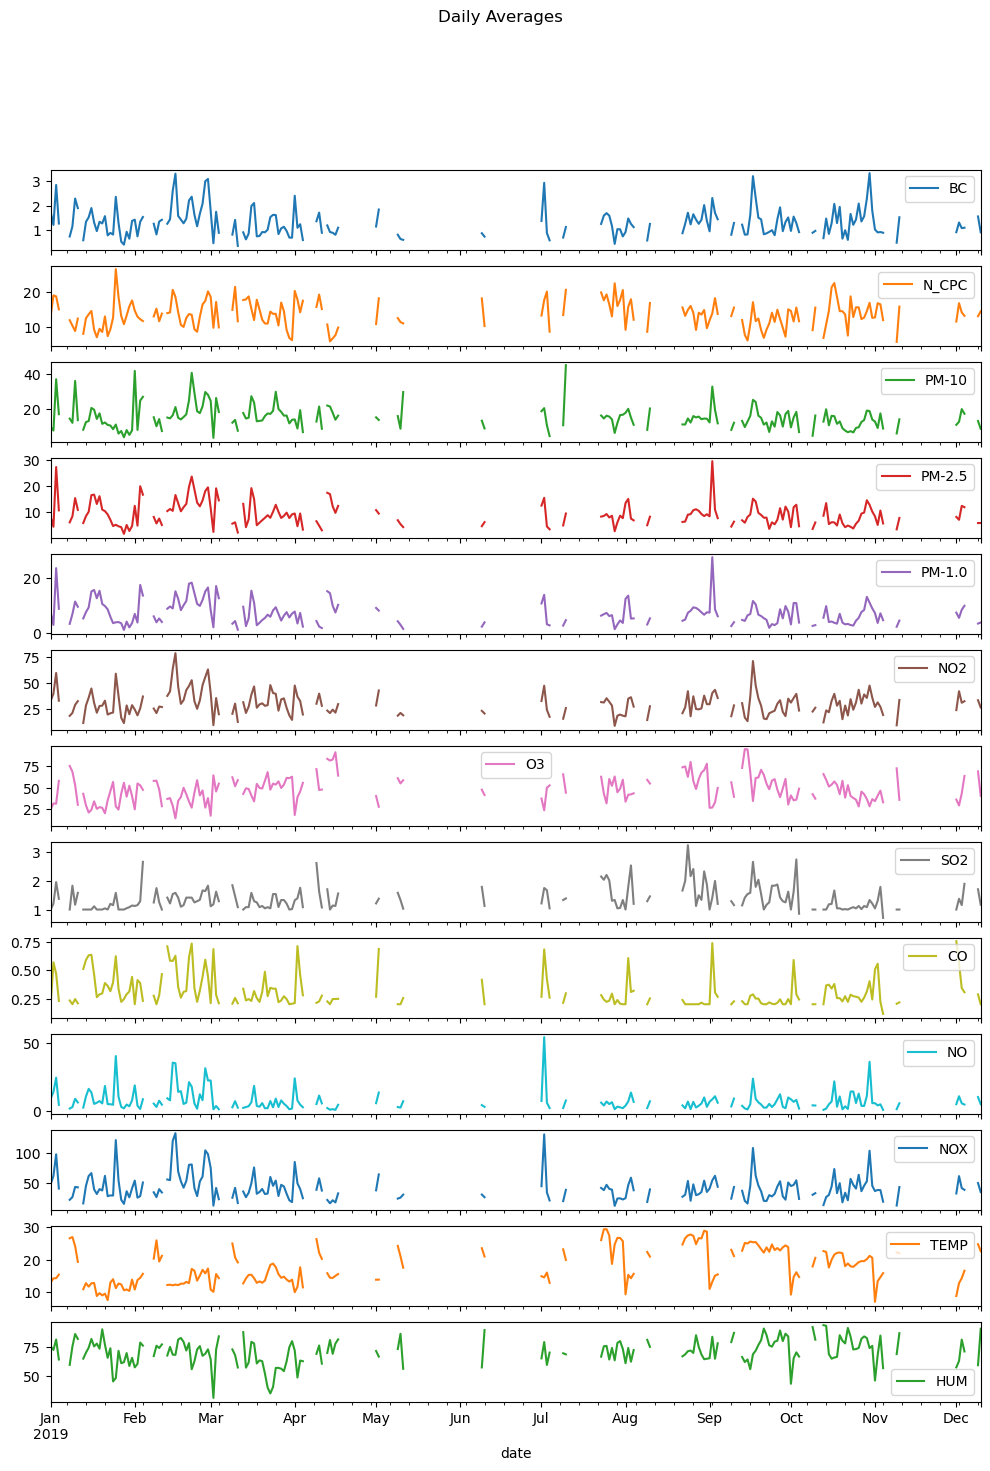

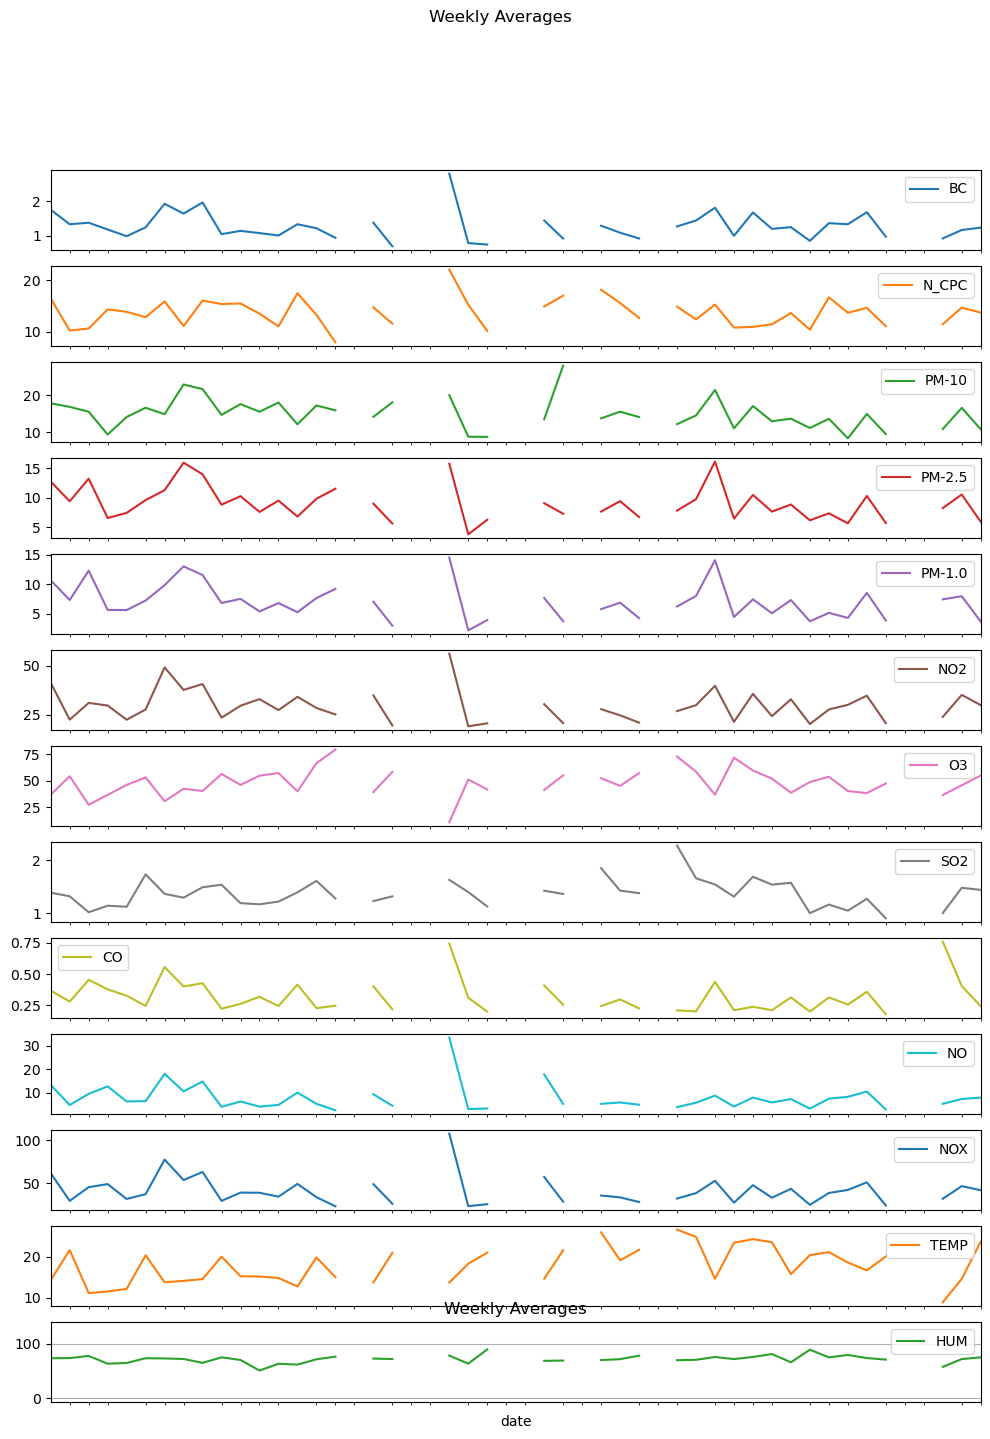

In [14]:
# Daily averages
daily_data = data.resample('D').mean()

# Weekly averages
weekly_data = data.resample('W').mean()

# Visualize the daily and weekly trends using line charts
daily_data.plot(subplots=True, figsize=(12, 16), title='Daily Averages')
weekly_data.plot(subplots=True, figsize=(12, 16), title='Weekly Averages')

# Visualize the daily and weekly trends using box plots
daily_data.boxplot(figsize=(12, 7))
plt.title('Daily Averages')
weekly_data.boxplot(figsize=(12, 7))
plt.title('Weekly Averages')

plt.show()

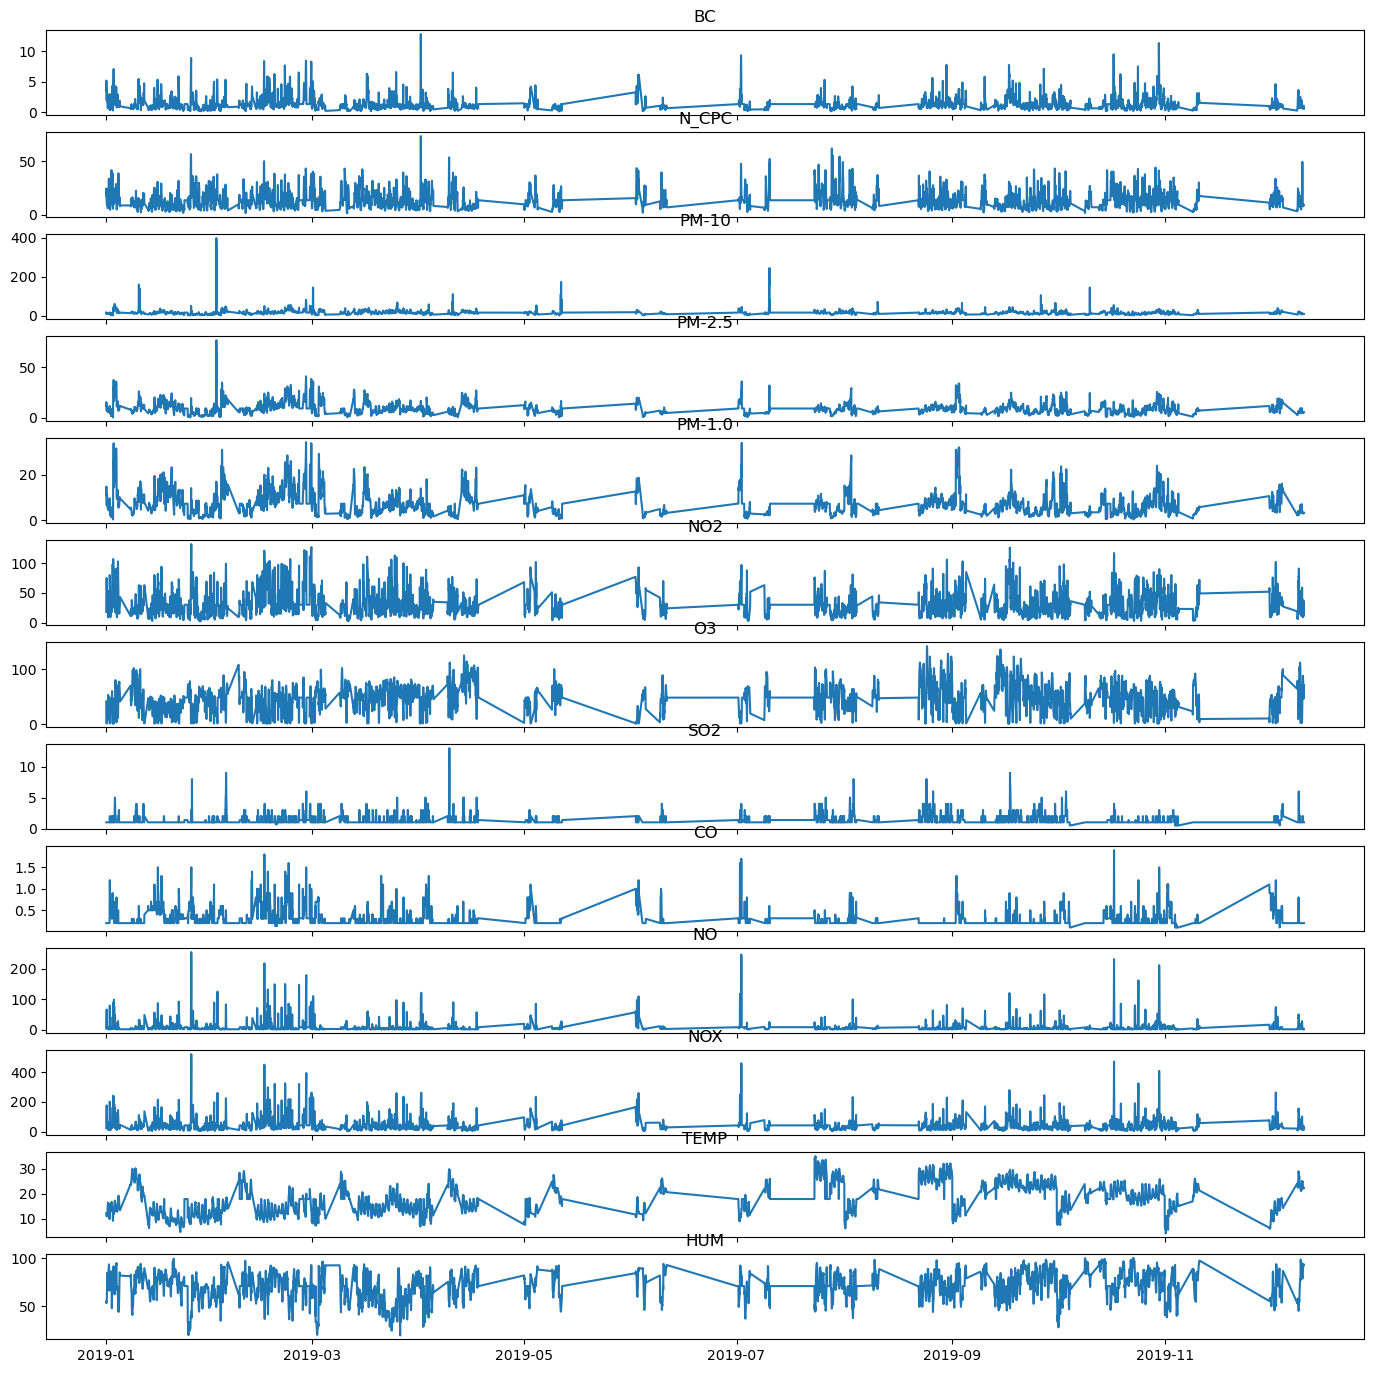

In [15]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(data, data.columns)

(3984, 13) (600, 13)


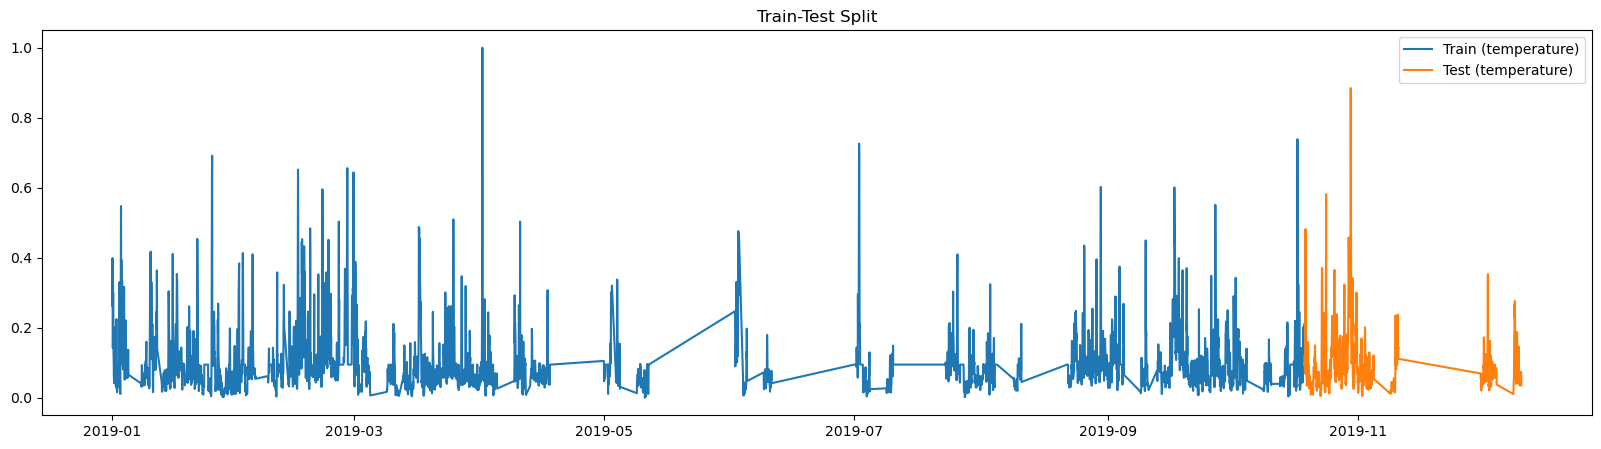

In [19]:
test_size = 600

X_train_raw = data.iloc[:-test_size]
# y_train_raw = y.iloc[:-test_size]
X_test_raw = data.iloc[-test_size:]
# y_test_raw = y.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize both features and labels
X_min = X_train_raw.min()
X_max = X_train_raw.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

plt.figure(figsize=(20,5))
plt.plot(X_train_raw.BC, label='Train (temperature)')
plt.plot(X_test_raw.BC, label='Test (temperature)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

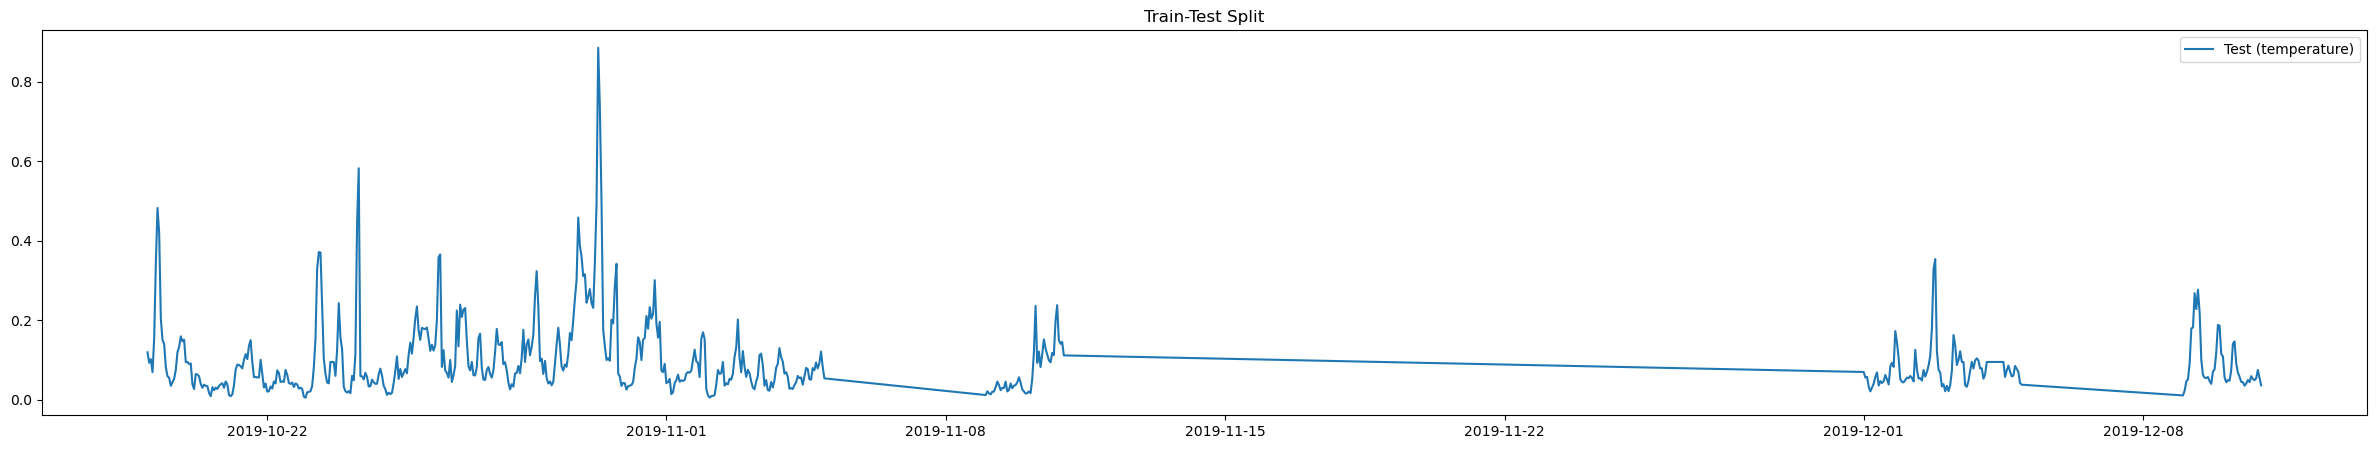

In [17]:
plt.figure(figsize=(30,5))
plt.plot(X_test_raw.BC, label='Test (temperature)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [18]:
data.to_csv('filled.csv', index=True)